Fuente de datos: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

# **Explicación del dataset**

**distance_from_home**: la distancia desde el hogar donde se realizó la transacción.

**distance_from_last_transaction**:  la distancia desde la última transacción realizada.

**ratio_to_median_purchase_price**: relación entre el precio de compra de la transacción y el precio de compra medio.

**repeat_retailer**:  ¿la transacción se realizó en el mismo minorista?

**used_chip**: Es la transacción a través de chip (tarjeta de crédito).

**used_pin_number**: ¿la transacción se realizó utilizando el número PIN?

**online_order**: ¿Es la transacción un pedido en línea?

**fraud**: ¿Es la transacción fraudulenta?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Análisis exploratorio

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          -------

<ipython-input-43-a86d1f2a2865>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop("ratio_to_median_purchase_price",1)


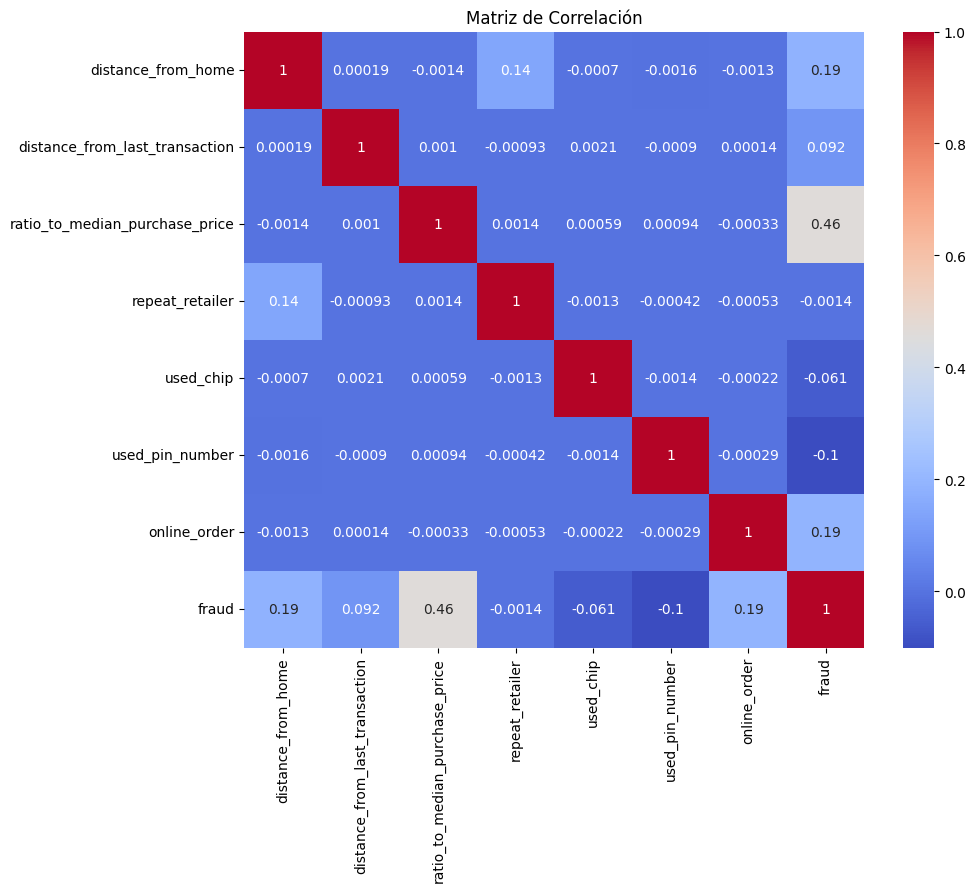

In [ ]:
# prompt: correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Las variables que más se correlacionan con el fraude son `ratio_to_median_purchase_price`, `online_order` y `distance_from_home`

In [ ]:
print(df.describe())

       distance_from_home  distance_from_last_transaction  \
count       274919.000000                   274919.000000   
mean            26.700359                        4.972016   
std             64.681779                       22.638059   
min              0.021322                        0.000419   
25%              3.856735                        0.296172   
50%              9.949245                        1.002618   
75%             25.684991                        3.354715   
max           5797.972589                     2663.513077   

       ratio_to_median_purchase_price  repeat_retailer      used_chip  \
count                   274919.000000    274919.000000  274919.000000   
mean                         1.814880         0.881823       0.351333   
std                          2.783322         0.322818       0.477388   
min                          0.004399         0.000000       0.000000   
25%                          0.474639         1.000000       0.000000   
50%         

In [ ]:
# Cantidad de fraudes

fraud = df[df["fraud"] == 1]
used_pin_number = fraud["used_pin_number"].sum()
print(f"Number of fraudulent transactions: {fraud.shape[0]}")
print(f"Number of times PIN was used in fraudulent transactions: {used_pin_number}")

Number of fraudulent transactions: 87403
Number of times PIN was used in fraudulent transactions: 273.0


# Entrenamiento de modelos de Machine learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
#plt.figure(figsize=(200, 100))
#plot_tree(clf, feature_names=X.columns, class_names=["No Fraude", "Fraude"], filled=True)
#plt.show()

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.88522
Coincidieron: 177044 y en total eran: 200000 filas, por lo tanto falló 22956 veces


In [ ]:
from google.colab import drive
drive.mount('/content/drive')